In [1]:
import numpy as np
np.random.seed(42)

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Hopfield Network Class
class HopfieldNetwork:
    def __init__(self, size):
        self.size = size
        self.weights = np.zeros((size, size))

    def train(self, patterns):
        for p in patterns:
            p = p.reshape(self.size, 1)
            self.weights += np.dot(p, p.T)
        np.fill_diagonal(self.weights, 0)

    def recall(self, pattern, steps=10):
        s = pattern.copy()
        for _ in range(steps):
            i = np.random.randint(0, self.size)
            s[i] = 1 if np.dot(self.weights[i], s) >= 0 else -1
        return s

In [6]:
def show(pattern, title):
    plt.imshow(pattern.reshape(10,10), cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

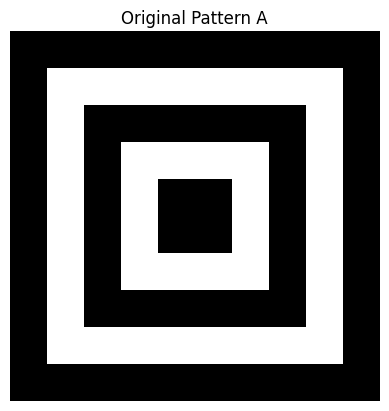

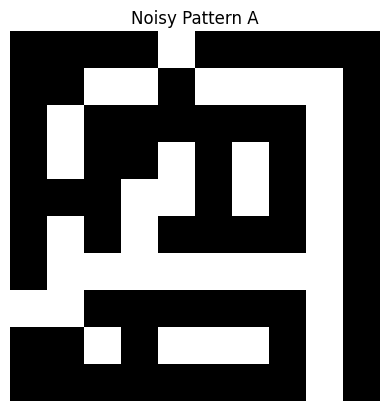

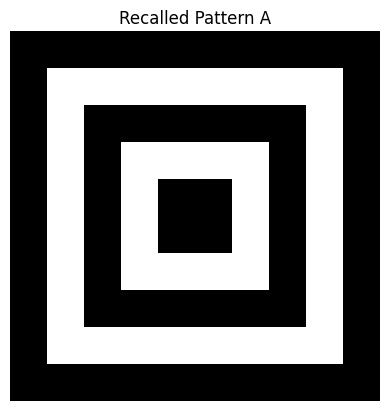

In [8]:
pattern_A = np.array([
    [1,1,1,1,1,1,1,1,1,1],
    [1,-1,-1,-1,-1,-1,-1,-1,-1,1],
    [1,-1,1,1,1,1,1,1,-1,1],
    [1,-1,1,-1,-1,-1,-1,1,-1,1],
    [1,-1,1,-1,1,1,-1,1,-1,1],
    [1,-1,1,-1,1,1,-1,1,-1,1],
    [1,-1,1,-1,-1,-1,-1,1,-1,1],
    [1,-1,1,1,1,1,1,1,-1,1],
    [1,-1,-1,-1,-1,-1,-1,-1,-1,1],
    [1,1,1,1,1,1,1,1,1,1],
]).reshape(100)

pattern_B = np.random.choice([-1,1], size=(100,))
pattern_C = np.random.choice([-1,1], size=(100,))

patterns = np.array([pattern_A, pattern_B, pattern_C])

# Train network
hopnet = HopfieldNetwork(100)
hopnet.train(patterns)

# Create noisy version
noisy = pattern_A.copy()
noise_idx = np.random.choice(range(100), size=15, replace=False)
noisy[noise_idx] *= -1

# Recall
recalled = hopnet.recall(noisy)

# Display
show(pattern_A, "Original Pattern A")
show(noisy, "Noisy Pattern A")
show(recalled, "Recalled Pattern A")